In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#plt.style.use("ggplot")
"tableau-colorblind10"
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/train/"))
random_state = 43
# Any results you write to the current directory are saved as output.

['train.csv']


In [2]:
data = pd.read_csv("../input/train/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

# Dependent Variables

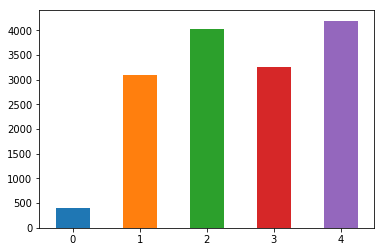

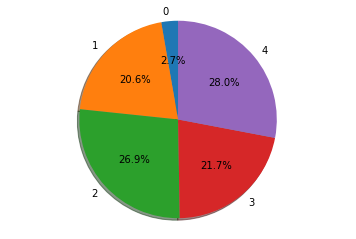

In [3]:
y_stat = data["AdoptionSpeed"].value_counts().sort_index()
y_stat.plot("bar",rot = 0)
y_pct = y_stat.apply(lambda x: x/(y_stat.sum()))
fig1, ax1 = plt.subplots()
ax1.pie(y_pct,labels = y_pct.index, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This is an imbalance dataset, the "0" is much more less than others, there are two methods:
 - Under sampling
     After under sampling the dataset is balanced. However, the dataset only has 2487 observations which is obviously not enough for a complex model. In addition, this mehtod will has sampling bias and loss information
 - Over sampling
     Increase the likelihood of overfitting because it replicates too much "0" case

The length of orginal data 14993


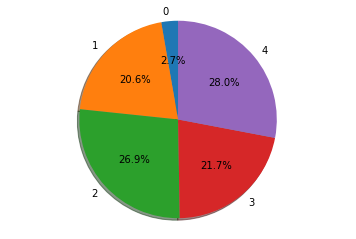

The length of over-sample data 17453


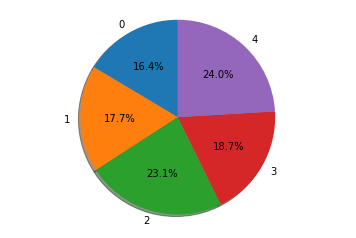

The length of orginal data 14993


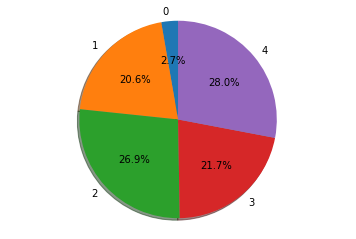

The length of under-sample data 2487


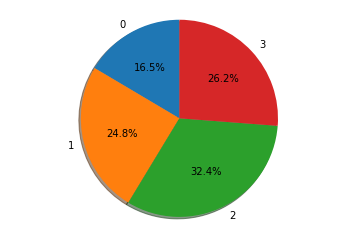

In [4]:
def sampling(df,mode = None,random_state = 43):
    print("The length of orginal data {}".format(len(df)))
    independent_stat = df["AdoptionSpeed"].value_counts().sort_index()
    independent_pct = independent_stat.apply(lambda x: x/(independent_stat.sum()))
    fig1, ax1 = plt.subplots()
    ax1.pie(independent_pct,labels = independent_pct.index, autopct='%1.1f%%',
    shadow=True, startangle=90)
    ax1.axis('equal')
    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    if mode == 'under':
        df_undersample = df[df["AdoptionSpeed"] == 0]
        for i in range(1,4):
            df_temp = df[df["AdoptionSpeed"] == i].sample(frac = 0.2,random_state=random_state)
            df_undersample = pd.concat([df_undersample,df_temp], axis = 0)
        y_sample = df_undersample["AdoptionSpeed"].value_counts().sort_index()
        y_sample_pct = y_sample.apply(lambda x: x/(y_sample .sum()))
        print("The length of under-sample data {}".format(len(df_undersample)))
        fig1, ax1 = plt.subplots()
        ax1.pie(y_sample_pct,labels = y_sample_pct.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
        ax1.axis('equal')
        # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
        return df_undersample.sample(frac=1,random_state = random_state)
    if mode == 'over':
        df_0 = df[df["AdoptionSpeed"] == 0]
        times = int(np.floor(y_stat.mean()/y_stat[0])-1)
        df_oversample = pd.concat([df_0]*times+[df], axis = 0)
        y_sample = df_oversample["AdoptionSpeed"].value_counts().sort_index()
        y_sample_pct = y_sample.apply(lambda x: x/(y_sample .sum()))
        print("The length of over-sample data {}".format(len(df_oversample)))
        fig1, ax1 = plt.subplots()
        ax1.pie(y_sample_pct,labels = y_sample_pct.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
        ax1.axis('equal')
        # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
        return df_oversample.sample(frac=1,random_state = random_state)
data_over = sampling(data,'over')
data_under = sampling(data,'under')

# Independent Variables
Let's explore each independent variables

In [5]:
data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

"Type" means "Type of animal (1 = Dog, 2 = Cat)". Categorical data, not ordinal

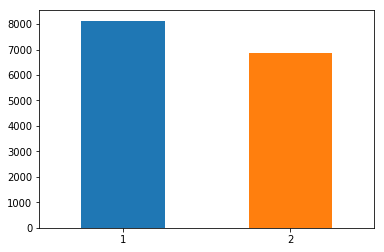

In [6]:
data["Type"].value_counts().sort_index().plot("bar",rot = 0)

Age - Age of pet when listed, in months.
    This varaible has much outliers


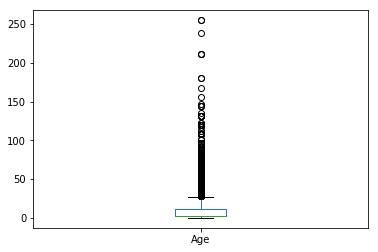

In [7]:
data["Age"].plot("box")

In [8]:
age_10 = data[data["Age"] > 120][["Name","Age","Description","AdoptionSpeed"]];age_10

,Name,Age,Description,AdoptionSpeed
513,Ah Mao,132,"My name Chan Kok Wai, a 66 year old man who ha...",3
1363,Teddie,144,Teddie is a very good-natured dog. He is a ped...,3
1858,Yuki,132,"This is Yuki, a mix Min Pinscher up for adopti...",2
1867,No Name,135,I found a male schnauzer roaming around my are...,3
2497,Sushi,132,A Jack Russel Terrier for adoption. Comes from...,4
3931,Baby,132,"My name Chan Kok Wai, a 66 year old man who ha...",3
3998,Kitkat,212,Hi friends I found this kitten on the field wh...,3
5160,Happy-FIFI,255,very suitable to be a guard. easy handle. :) c...,4
6569,Bobby,122,Bobby is a youthful looking dog despite his ag...,4
6666,Beagle,123,This pet has been abandon at a veterinary clin...,4


In [9]:
for line in age_10.iterrows():
    print("\nName: {}\nAge: {} year,{} month\nAdoptionSpeed: {}\nDescription: {}\n================"\
          .format(line[1][0],line[1][1]/12,line[1][1],line[1][3],line[1][2]))


Name: Ah Mao
Age: 11.0 year,132 month
AdoptionSpeed: 3
Description: My name Chan Kok Wai, a 66 year old man who has rescued and cared for 7 cats. They are aged between 3 to 15 years. Over the years, I have developed a number of illnesses which have rendered me incapacitated, and under doctor's advice, I am incapable look after and care for these 7 rescued cats. These 7 cats are rescued as strays in the vicinity of my abode in Shah Alam and the streets of Subang Jaya. ALL these 7 cats, 4 females and 3 males, are spayed and neutered, and are in good state of health. They are fed on premium cat food all their lives, namely Science Plan, IAMS and Matisse (an Italian brand). Ever since they were kittens, their medical needs have been catered for by Healing Rooms in Subang Jaya. Contact: (Gabrielle)

Name: Teddie
Age: 12.0 year,144 month
AdoptionSpeed: 3
Description: Teddie is a very good-natured dog. He is a pedigree dog dumped from young at a car workshop in Sg Buloh and has lived there f

Some outliers, we can correct the age from it's description, for example:

>Name: Kitkat
Age: 17.666666666666668 year,212 month
AdoptionSpeed: 3
Description: Hi friends I found this kitten on the field when I was walking my dog been with me since then and now he is 2 1/2 months old. She is very active and playful. Looking for a home for her pls contact me if you wish to adopt her at dewormed, vaccinated and litter box trained

This should be 2 or 3

>Name: Snow
Age: 17.666666666666668 year,212 month
AdoptionSpeed: 4
Description: Heyyyy Meet Snow ! She's 2 n half months old , she's a mix a breed, such a playful baby, active like no one's business , she loves jumping n playing with everything she can get hold off but she's an angel ! I would love to keep her..but due to some circumstances i have to give her away ! All she need someone to love her more n a new home..! She is up for adoption !

This should be 2 or 3

>Name: Three Kittens
Age: 17.666666666666668 year,212 month
AdoptionSpeed: 3
Description: They are three small kittens. Active and lovable. They require a home as soon as possible. I will provide you with free food as your starter pack. We have 1. two males: - one fully black - black and white 2. female: -white, black and cream

From it's description, I guess it also means 2 1/2 month, on the other hand 2 or 3


However, there are still some observations has large age but can find some clue in the description 
>Name: Happy-FIFI
Age: 21.25 year,255 month
AdoptionSpeed: 4
Description: very suitable to be a guard. easy handle. :) cute and fierce to strangers
        
>Name: Tiger
Age: 15.0 year,180 month
AdoptionSpeed: 4
Description: Cute, lovely, intelligent and obedient dog. Wish to adopt it further but i'm migrating overseas. Please sms or Whatsapp me (Christine) at if interested. Thanks.
   
>Name: Spottie
Age: 12.0 year,144 month
AdoptionSpeed: 4
Description: Attentive & always on the look out for strangers. Gentle to children.

>Name: Buk Buk
Age: 12.25 year,147 month
AdoptionSpeed: 1
Description: Very affectionate Siamese Cat needs a new home. Owner moving to condominium that doesn't allow pets.

>Name: Three Kittens
Age: 17.666666666666668 year,212 month
AdoptionSpeed: 3
Description: They are three small kittens. Active and lovable. They require a home as soon as possible. I will provide you with free food as your starter pack. We have 1. two males: - one fully black - black and white 2. female: -white, black and cream

>Name: Enzo
Age: 19.833333333333332 year,238 month
AdoptionSpeed: 4
Description: Enzo was adopted from a pet store, and raised well. Mostly stayed indoors. Feed twice a day. Easy to bath. Clean & healthy. Know some tricks. Friendly and adorable.

In [10]:
age_mask = data["Age"] == 212
data.loc[age_mask,"Age"] = 3

In [ ]:
import matplotlib.pyplot as plt

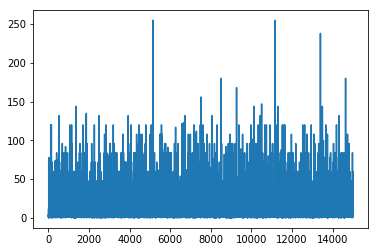

In [57]:
data["Age"].plot("line")

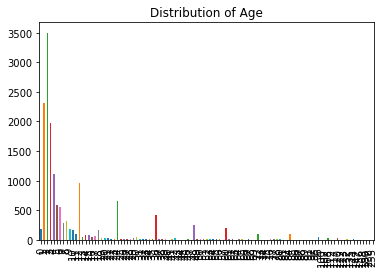

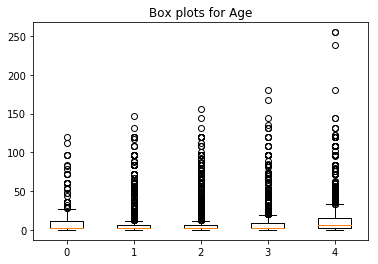

In [76]:
def boxplots(df,col):
    #with plt.style.context(('ggplot')):
    df[col].value_counts().sort_index().plot("bar",
                                             #rot = 0,
                                             title = "Distribution of {}".format(col))
    fig = plt.figure() 
    ax = plt.subplot()  
    ax.boxplot([df[df["AdoptionSpeed"] == i][col] for i in range(5)],labels = [0,1,2,3,4])
    plt.title("Box plots for {}".format(col))
    plt.show()
boxplots(data,"Age")

In [71]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [12]:
data_y0 = data[data["Age"] == 0]

Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

In [86]:
def pieplots(df,col):
    df_col = df[col].value_counts().sort_index()
    iter_list = df_col.index
    n = len(iter_list)
    n_y = int(np.ceil(n/2))
    with plt.style.context(('ggplot')):
        
        df_col.plot("bar",rot = 0,title = "Distribution of {}".format(col))
        
        fig, axs = plt.subplots(n_y, 2,figsize=(10,10))
        for i,key in enumerate(iter_list):
            df_sub = df[df[col] == key]
            y_stat = df_sub["AdoptionSpeed"].value_counts().sort_index()
            y_pct = y_stat.apply(lambda x: x/(y_stat.sum()))
            nrow = int(np.floor(i/2))
            ncol = i%2
            #print(nrow,ncol)
            axs[nrow,ncol].pie(y_pct,labels = y_pct.index, 
                   autopct='%1.1f%%',
            shadow=True, 
                   startangle=90,

                  )
            axs[nrow,ncol].set_title("Pie plot of {}-{}".format(col,key))
        plt.show()

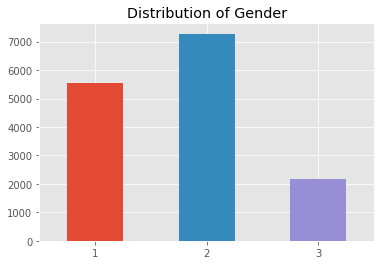

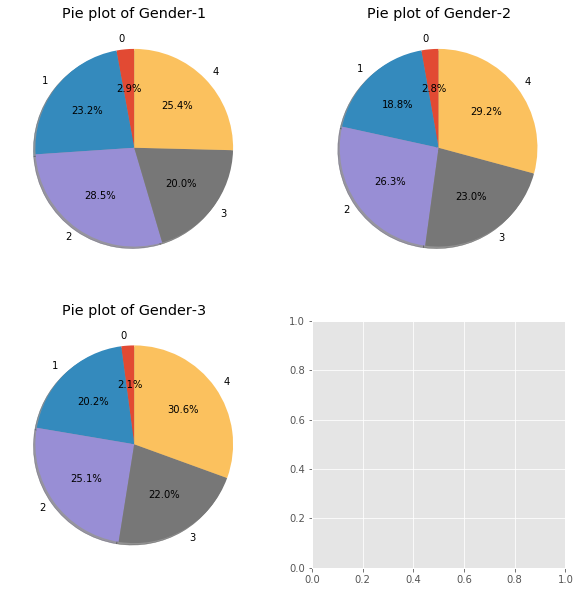

In [87]:
pieplots(data,"Gender")        

Gender seems dose not impact the "AdoptionSpeed"

 'MaturitySize' - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)

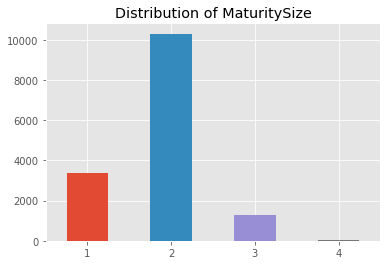

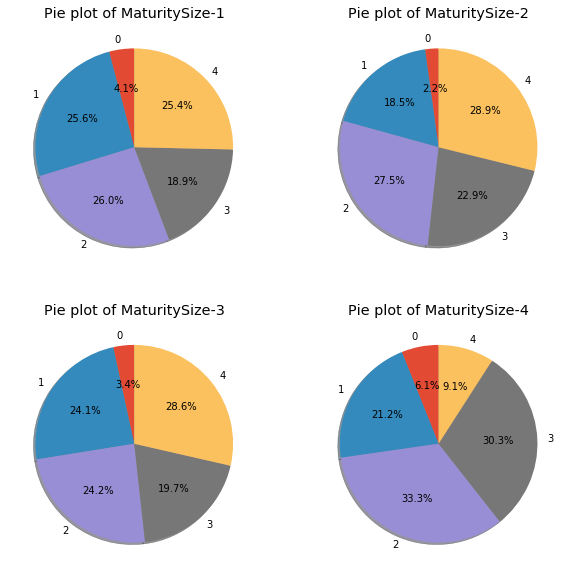

2    10305
1     3395
3     1260
4       33
Name: MaturitySize, dtype: int64

In [88]:
pieplots(data,"MaturitySize")  
data["MaturitySize"].value_counts()

The distributuion seems different, but the obsevations with "MaturitySize" = 4 are too small that could be random.

'FurLength'- Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

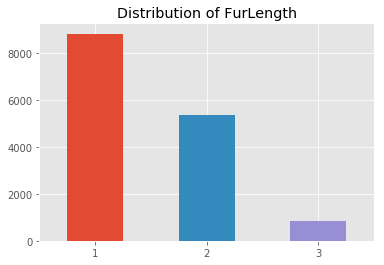

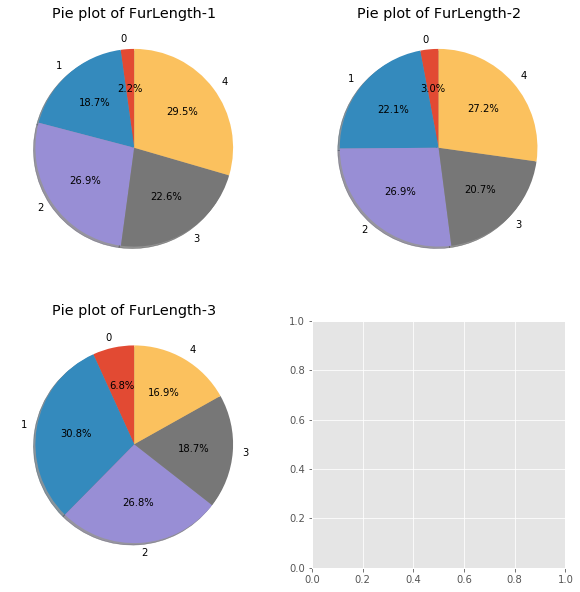

1    8808
2    5361
3     824
Name: FurLength, dtype: int64

In [89]:
pieplots(data,"FurLength")  
data["FurLength"].value_counts()

'Vaccinated' - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)

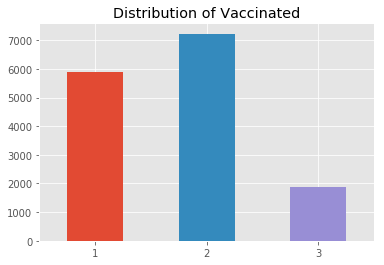

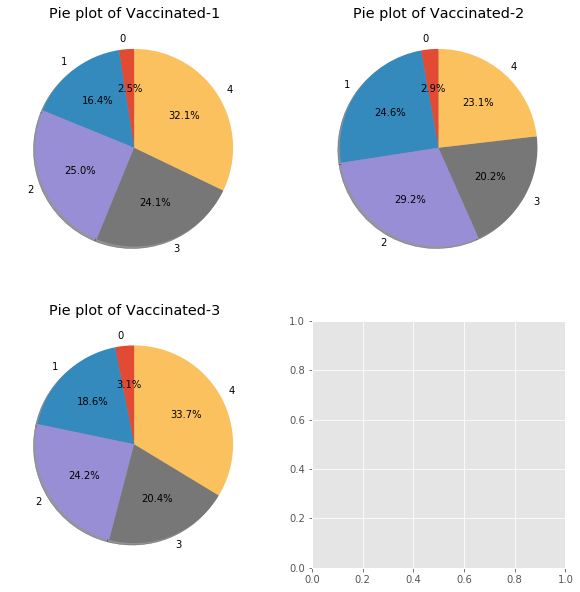

2    7227
1    5898
3    1868
Name: Vaccinated, dtype: int64

In [90]:
pieplots(data,"Vaccinated")  
data["Vaccinated"].value_counts()

"Dewormed" - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)

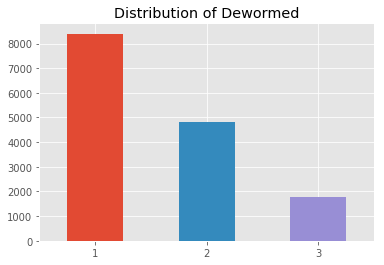

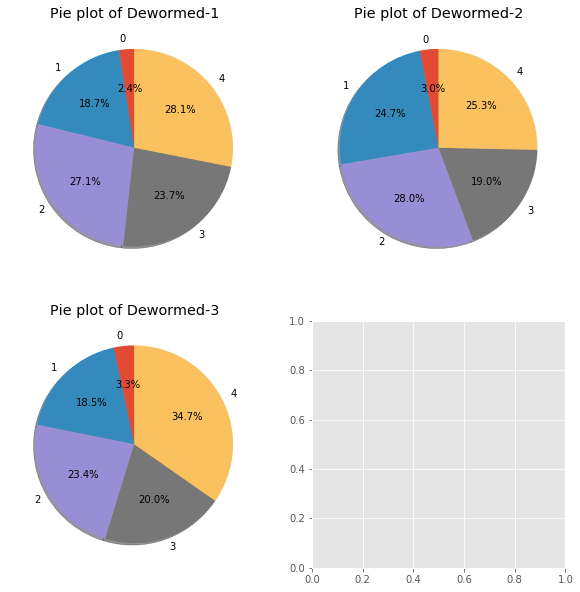

1    8397
2    4815
3    1781
Name: Dewormed, dtype: int64

In [91]:
pieplots(data,"Dewormed")  
data["Dewormed"].value_counts()

"Sterilized" - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

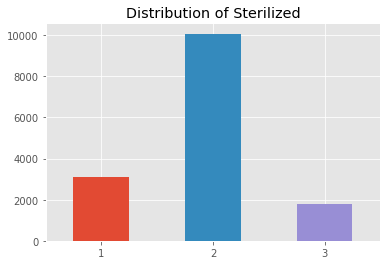

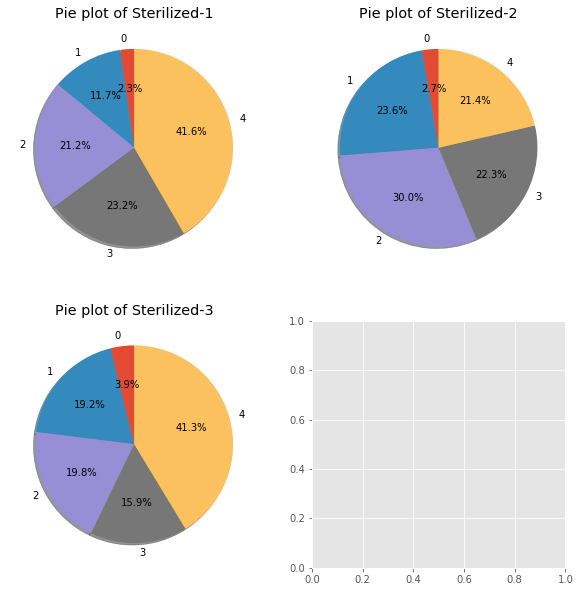

2    10077
1     3101
3     1815
Name: Sterilized, dtype: int64

In [92]:
pieplots(data,"Sterilized")  
data["Sterilized"].value_counts()

"Health" - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

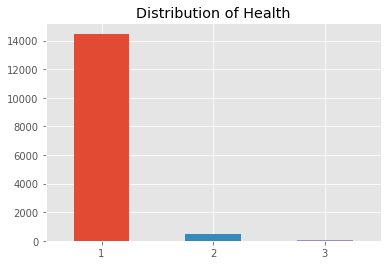

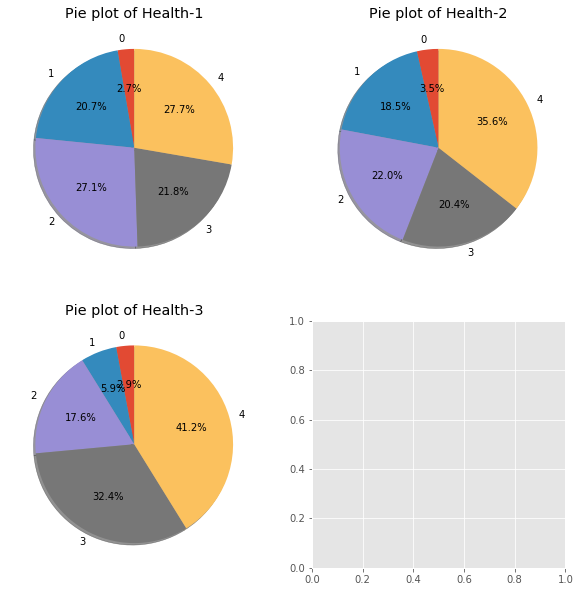

1    14478
2      481
3       34
Name: Health, dtype: int64

In [93]:
pieplots(data,"Health")  
data["Health"].value_counts()

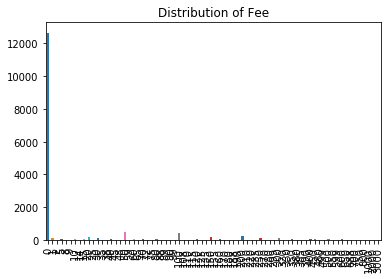

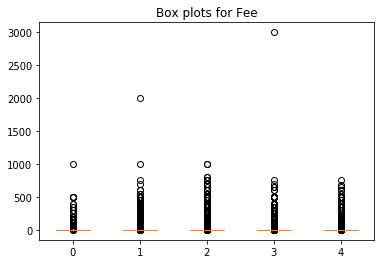

In [77]:
boxplots(data,"Fee")

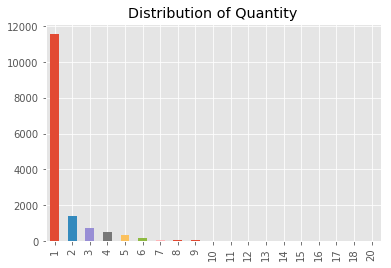

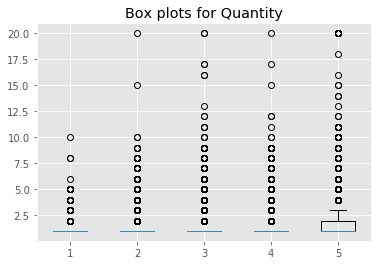

In [65]:
boxplots(data,"Quantity")

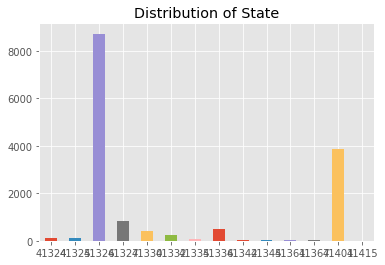

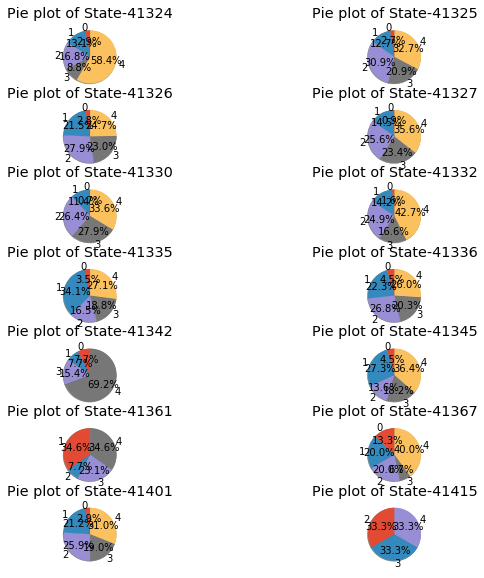

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

In [94]:
pieplots(data,"State")  
data["State"].value_counts()

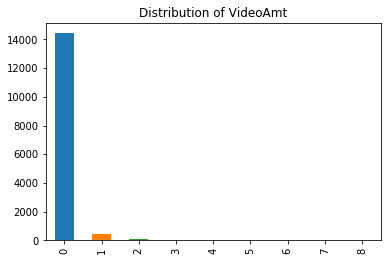

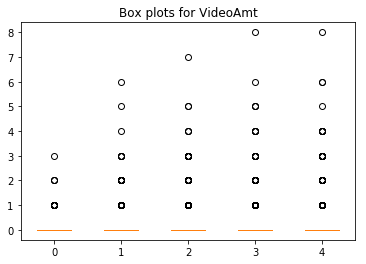

In [84]:
boxplots(data,"VideoAmt")

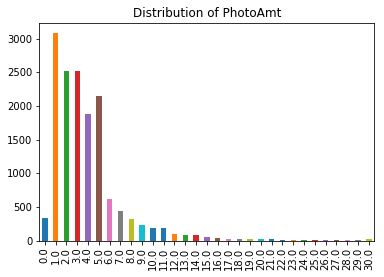

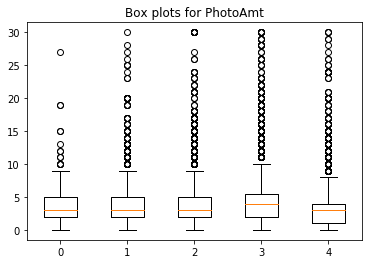

In [85]:
boxplots(data,"PhotoAmt")